# Advanced Audio Processing, Part 1: Acoustics and Sound Localization

This is a test notebook to check if your installation is working. Please execute the following cells and check if their are executing correctly. If not, please contact your teacher to try to debug your configuration before the first practical session.

In [2]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
from client import array
import time

### When working with the acquisition system (only works with the hardware)

In [3]:
antenne=array('server')

### When working on recorded files (to play files offline)

In [4]:
antenne=array('play')

### Get parameters and read data

In [8]:
Fs = antenne.fs
BLK = antenne.blocksize
# m = antenne.read()
print('Fs = ',  Fs)
print('BLK = ', BLK )
## les signaux :
# m1 = antenne.read()
# m2 = antenne.read()
m4 = antenne.read()
# m6 = antenne.read()
# m8 = antenne.read()
# m10 = antenne.read()

Fs =  20000.0
BLK =  200


In [11]:
### Question 3

# with f= 100 hz

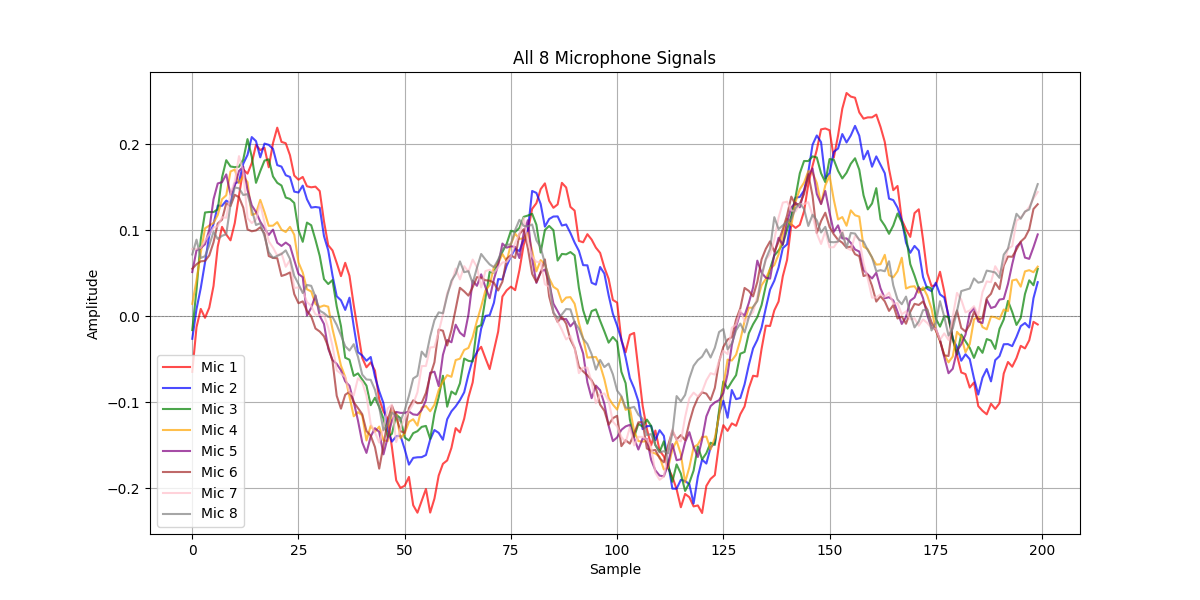

(200, 8)


In [14]:
# Read one buffer
m = antenne.read()

# Define 8 distinct colors
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

# Plot microphone signals
plt.figure(figsize=(12, 6))
for i in range(m.shape[1]):
    plt.plot(m[:,i], label=f'Mic {i+1}', color=colors[i], alpha=0.7)

plt.axhline(0, color='black', linestyle='--', linewidth=0.5, alpha=0.3)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.title('All 8 Microphone Signals')
plt.show()

print(m.shape)


Question 21: Source localization using preparation equations
Running global optimization...

From spherical wave equation (1):
Estimated: θ_s=62.19° (from Z-axis), r_s=0.278m
Estimated position: z=0.130m, x=0.246m
Real: θ_s=72.65° (from Z-axis), r_s=0.503m
Real position: z=0.150m, x=0.480m
Angle error: 10.46°
Distance error: 22.5cm
Position error: 23.5cm

Delay comparison:
  M1: meas=+0.4000ms, pred=+0.4122ms, err=0.0122ms
  M2: meas=+0.3000ms, pred=+0.2753ms, err=0.0247ms
  M3: meas=+0.1500ms, pred=+0.1509ms, err=0.0009ms
  M4: meas=+0.0000ms, pred=+0.0443ms, err=0.0443ms
  M5: meas=+0.0000ms, pred=-0.0369ms, err=0.0369ms
  M6: meas=-0.1000ms, pred=-0.0843ms, err=0.0157ms
  M7: meas=-0.1000ms, pred=-0.0911ms, err=0.0089ms
  M8: meas=-0.0500ms, pred=-0.0563ms, err=0.0063ms


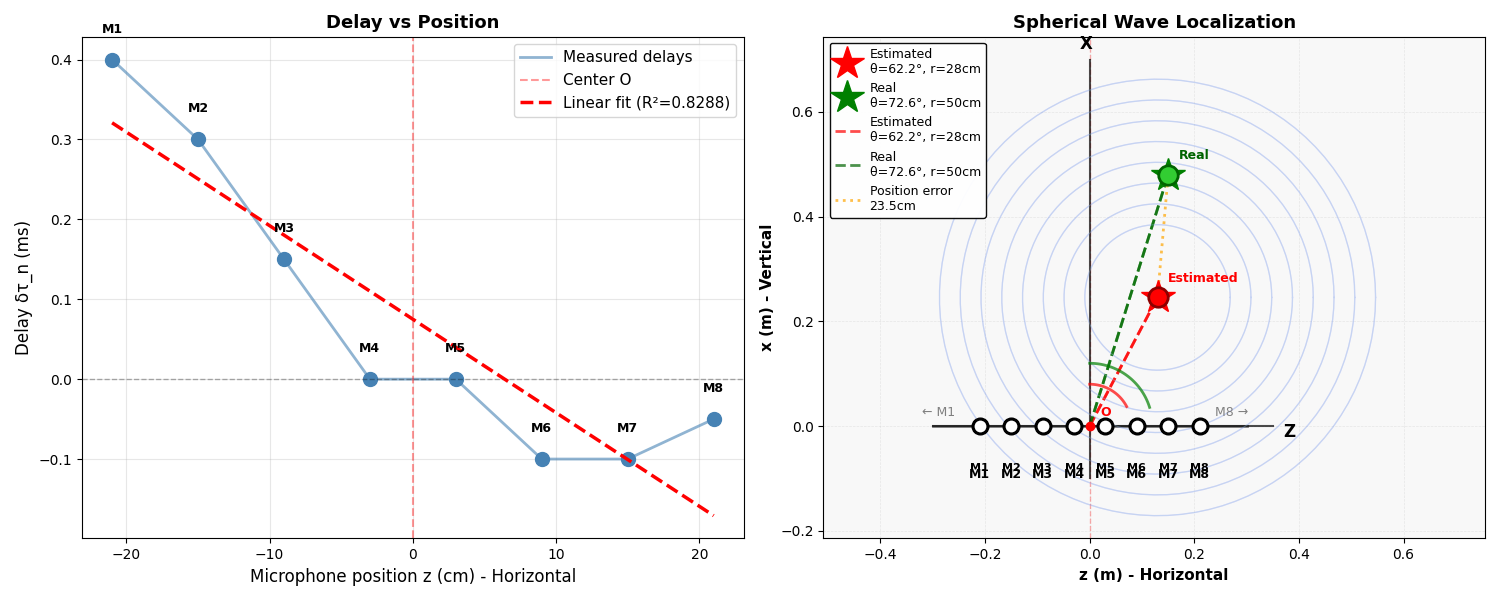

In [16]:
# ==================== Q21 - IMPROVED VISUALIZATION ====================
print("\nQuestion 21: Source localization using preparation equations")
print("="*60)

ax2 = plt.subplot(1, 2, 2)

if wavefront_type == "plane":
    # PLANE WAVE
    sin_theta = -slope * c
    sin_theta = np.clip(sin_theta, -1, 1)
    theta_s_est = np.arcsin(sin_theta)
    theta_s_deg = np.degrees(theta_s_est)
    
    print(f"From plane wave equation: sin(θ_s) = {sin_theta:.4f}")
    print(f"Estimated angle: θ_s = {theta_s_deg:.2f}° (from Z-axis)")
    print(f"Real angle: θ_s = {theta_s_real:.2f}° (from Z-axis)")
    print(f"Error: {abs(theta_s_deg - theta_s_real):.2f}°")
    
    # Visualization
    for i in range(N_mics):
        ax2.plot(z_n[i], 0, 'o', color='black', markersize=10, 
                markeredgewidth=1.5, markeredgecolor='black', 
                markerfacecolor='white', zorder=5)
        ax2.text(z_n[i], -0.08, f'M{i+1}', ha='center', va='top', 
                 fontsize=8, fontweight='bold')
    
    # Draw axes
    ax2.plot([-0.3, 0.3], [0, 0], 'k-', linewidth=1.5, alpha=0.7)
    ax2.plot([0, 0], [-0.1, 0.6], 'k-', linewidth=1.5, alpha=0.7)
    ax2.text(0.32, -0.02, 'Z', fontsize=12, fontweight='bold')
    ax2.text(-0.02, 0.62, 'X', fontsize=12, fontweight='bold')
    
    # Wave fronts
    theta_rad = np.radians(theta_s_deg)
    for offset in np.linspace(-0.6, 0.6, 10):
        z_w = np.linspace(-0.35, 0.35, 50)
        x_w = z_w * np.tan(theta_rad) + offset / np.cos(theta_rad)
        ax2.plot(z_w, x_w, '-', color='lightblue', alpha=0.4, linewidth=0.8)
    
    # Direction arrow (estimated)
    arrow_len = 0.3
    arrow_z = arrow_len * np.cos(theta_rad)
    arrow_x = arrow_len * np.sin(theta_rad)
    ax2.arrow(0, 0, arrow_z, arrow_x, head_width=0.025, head_length=0.025,
              fc='red', ec='red', linewidth=2, zorder=4)
    
    # Real source - professional marker
    ax2.plot(z_s_real, x_s_real, 'o', markersize=12, 
            markerfacecolor='limegreen', markeredgecolor='darkgreen', 
            markeredgewidth=2, label=f'Real source\nθ={theta_s_real:.1f}°', zorder=6)
    ax2.plot([0, z_s_real], [0, x_s_real], '--', color='darkgreen', 
            linewidth=1.5, alpha=0.6)
    
    # Estimated direction line
    ax2.plot([0, arrow_z], [0, arrow_x], '--', color='red', 
            linewidth=1.5, alpha=0.6, label=f'Estimated: θ={theta_s_deg:.1f}°')
    
    ax2.set_title('Plane Wave Approximation', fontsize=13, fontweight='bold')
    ax2.set_xlim(-0.35, 0.35)
    ax2.set_ylim(-0.15, 0.6)

else:
    # SPHERICAL WAVE - Use equation (1)
    def cost_function(params):
        r_s, theta = params
        total_error = 0
        for i, z in enumerate(z_n):
            a = 1
            b = 2 * r_s
            c_eq = -(z**2 - 2*r_s*z*np.cos(theta))
            discriminant = b**2 - 4*a*c_eq
            
            if discriminant < 0:
                return 1e10
            
            d_n_pred = (-b + np.sqrt(discriminant)) / (2*a)
            tau_pred = d_n_pred / c
            tau_meas = delays[i]
            total_error += (tau_pred - tau_meas)**2
        
        return total_error
    
    # Global optimization
    print("Running global optimization...")
    bounds = [(0.1, 1.5), (np.radians(10), np.radians(89))]
    result = differential_evolution(cost_function, bounds, seed=42, maxiter=1000)
    
    r_s_est, theta_s_est = result.x
    theta_s_deg = np.degrees(theta_s_est)
    z_s_est = r_s_est * np.cos(theta_s_est)
    x_s_est = r_s_est * np.sin(theta_s_est)
    
    print(f"\nFrom spherical wave equation (1):")
    print(f"Estimated: θ_s={theta_s_deg:.2f}° (from Z-axis), r_s={r_s_est:.3f}m")
    print(f"Estimated position: z={z_s_est:.3f}m, x={x_s_est:.3f}m")
    print(f"Real: θ_s={theta_s_real:.2f}° (from Z-axis), r_s={r_s_real:.3f}m")
    print(f"Real position: z={z_s_real:.3f}m, x={x_s_real:.3f}m")
    print(f"Angle error: {abs(theta_s_deg-theta_s_real):.2f}°")
    print(f"Distance error: {abs(r_s_est-r_s_real)*100:.1f}cm")
    print(f"Position error: {np.sqrt((z_s_est-z_s_real)**2+(x_s_est-x_s_real)**2)*100:.1f}cm")
    
    # Check residuals
    print("\nDelay comparison:")
    for i in range(N_mics):
        z = z_n[i]
        a = 1
        b = 2 * r_s_est
        c_eq = -(z**2 - 2*r_s_est*z*np.cos(theta_s_est))
        disc = b**2 - 4*a*c_eq
        d_n_pred = (-b + np.sqrt(max(0, disc))) / (2*a) if disc >= 0 else 0
        pred_delay = d_n_pred / c
        print(f"  M{i+1}: meas={delays_ms[i]:+7.4f}ms, pred={pred_delay*1000:+7.4f}ms, err={abs(delays_ms[i]-pred_delay*1000):.4f}ms")
    
    # ========== PROFESSIONAL VISUALIZATION ==========
    
    # Microphones - hollow circles with black edge
    for i in range(N_mics):
        ax2.plot(z_n[i], 0, 'o', color='black', markersize=10, 
                markeredgewidth=1.5, markeredgecolor='black', 
                markerfacecolor='white', zorder=5)
        ax2.text(z_n[i], -0.07, f'M{i+1}', ha='center', va='top', 
                 fontsize=8, fontweight='bold', color='black')
    
    # Draw coordinate axes
    ax2.plot([-0.3, 0.35], [0, 0], 'k-', linewidth=1.5, alpha=0.7)
    ax2.plot([0, 0], [-0.1, 0.7], 'k-', linewidth=1.5, alpha=0.7)
    ax2.text(0.37, -0.02, 'Z', fontsize=12, fontweight='bold', color='black')
    ax2.text(-0.02, 0.72, 'X', fontsize=12, fontweight='bold', color='black')
    
    # Origin marker
    ax2.plot(0, 0, 'o', markersize=6, color='red', zorder=4)
    ax2.text(0.02, 0.02, 'O', fontsize=9, fontweight='bold', color='red')
    
    # Estimated source - solid red circle
    ax2.plot(z_s_est, x_s_est, 'o', markersize=14, 
            markerfacecolor='red', markeredgecolor='darkred', 
            markeredgewidth=2, zorder=6)
    ax2.text(z_s_est+0.02, x_s_est+0.03, 'Estimated', 
            fontsize=9, color='red', fontweight='bold')
    
    # Estimated distance line
    ax2.plot([0, z_s_est], [0, x_s_est], '--', color='red', 
            linewidth=2, alpha=0.7, label=f'Estimated\nθ={theta_s_deg:.1f}°, r={r_s_est*100:.0f}cm')
    
    # Real source - solid green circle
    ax2.plot(z_s_real, x_s_real, 'o', markersize=14, 
            markerfacecolor='limegreen', markeredgecolor='darkgreen', 
            markeredgewidth=2, zorder=6)
    ax2.text(z_s_real+0.02, x_s_real+0.03, 'Real', 
            fontsize=9, color='darkgreen', fontweight='bold')
    
    # Real distance line
    ax2.plot([0, z_s_real], [0, x_s_real], '--', color='darkgreen', 
            linewidth=2, alpha=0.7, label=f'Real\nθ={theta_s_real:.1f}°, r={r_s_real*100:.0f}cm')
    
    # Spherical wave fronts - centered at estimated source
    for rad in np.linspace(r_s_est*0.5, r_s_est*1.5, 8):
        theta_c = np.linspace(0, 2*np.pi, 100)
        ax2.plot(z_s_est + rad*np.cos(theta_c), x_s_est + rad*np.sin(theta_c),
                '-', color='lightblue', alpha=0.35, linewidth=0.8)
    
    # Error line between estimated and real
    ax2.plot([z_s_est, z_s_real], [x_s_est, x_s_real], ':', 
            color='orange', linewidth=2, alpha=0.7, 
            label=f'Position error\n{np.sqrt((z_s_est-z_s_real)**2+(x_s_est-x_s_real)**2)*100:.1f}cm')
    
    # Angle arc for estimated
    arc_radius = 0.08
    arc_theta = np.linspace(np.pi/2, np.pi/2 - theta_s_est, 30)
    ax2.plot(arc_radius*np.cos(arc_theta), arc_radius*np.sin(arc_theta), 
            '-', color='red', linewidth=2, alpha=0.7)
    
    # Angle arc for real
    arc_radius2 = 0.12
    arc_theta2 = np.linspace(np.pi/2, np.pi/2 - np.arctan(x_s_real/z_s_real), 30)
    ax2.plot(arc_radius2*np.cos(arc_theta2), arc_radius2*np.sin(arc_theta2), 
            '-', color='green', linewidth=2, alpha=0.7)
    
    ax2.set_title('Spherical Wave Localization', fontsize=13, fontweight='bold')
    ax2.set_xlim(-0.3, 0.35)
    ax2.set_ylim(-0.15, 0.7)

# Format
ax2.set_xlabel('z (m) - Horizontal', fontsize=11, fontweight='bold')
ax2.set_ylabel('x (m) - Vertical', fontsize=11, fontweight='bold')
ax2.grid(True, alpha=0.25, linestyle='--', linewidth=0.5)
ax2.legend(fontsize=9, loc='upper left', framealpha=0.95, edgecolor='black')
ax2.axis('equal')
ax2.set_facecolor('#f8f8f8')

plt.tight_layout()
plt.show()